In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

Mounted at /content/gdrive


In [3]:
dataset2 = pd.read_csv('/content/gdrive/My Drive/STBI/Dataset 2/quora_duplicate_questions.tsv', sep='\t', header=0)
dataset2[:2]

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [4]:
#dataset1=dataset1.head(100000)

In [5]:
dataset2.shape

(404290, 6)

In [6]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
q1 = dataset2[['qid1', 'question1']]
q1[:2]

,qid1,question1
0,1,What is the step by step guide to invest in sh...
1,3,What is the story of Kohinoor (Koh-i-Noor) Dia...


In [8]:
q2 = dataset2[['qid2', 'question2']]
q2[:2]

,qid2,question2
0,2,What is the step by step guide to invest in sh...
1,4,What would happen if the Indian government sto...


In [9]:
q1.columns = ['question_id', 'question']
q2.columns = ['question_id', 'question']

In [10]:
question = pd.concat([q1, q2]).reset_index(drop = True)
question = question.sort_values(by=['question_id']).reset_index(drop = True)
question[:2]

,question_id,question
0,1,What is the step by step guide to invest in sh...
1,2,What is the step by step guide to invest in sh...


In [11]:
len(question)

808580

In [12]:
duplicated_data = question[question.duplicated()]
print("Jumlah duplicated data: ", len(duplicated_data))
duplicated_data

Jumlah duplicated data:  270647


,question_id,question
3,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
4,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
5,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
7,4,What would happen if the Indian government sto...
13,9,"Which one dissolve in water quikly sugar, salt..."
...,...,...
804740,534098,What is a career path?
805507,534864,What are some mind boggling facts about billio...
805718,535074,Why is the TV show The Big Bang Theory not on ...
805959,535314,Who is responsible for crimes against women?


In [13]:
dataset2 = question.drop_duplicates(subset='question', keep="last").reset_index(drop = True)
duplicateQuestion = dataset2[dataset2.question.duplicated()]
print("Jumlah duplicated data: ", len(duplicateQuestion))

Jumlah duplicated data:  0


In [14]:
dataset2.isna().sum()

question_id    0
question       1
dtype: int64

In [15]:
dataset2[dataset2.question.isnull()]

,question_id,question
492770,493340,NaN


In [16]:
dataset2.dropna(inplace = True)

In [17]:
dataset2[dataset2.question.isnull()]

,question_id,question


In [18]:
print(dataset2.question[6527])
print(dataset2.question[37785])

.
…………..


In [19]:
dataset2.drop([6527, 37785], inplace = True )

In [20]:
dataset2 = dataset2.reset_index(drop = True)
dataset2['raw_question'] = dataset2['question'] 
dataset2

,question_id,question,raw_question
0,1,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
2,3,What is the story of Kohinoor (Koh-i-Noor) Dia...,What is the story of Kohinoor (Koh-i-Noor) Dia...
3,4,What would happen if the Indian government sto...,What would happen if the Indian government sto...
4,5,How can I increase the speed of my internet co...,How can I increase the speed of my internet co...
...,...,...,...
537353,537929,What's this coin?,What's this coin?
537354,537930,What is the approx annual cost of living while...,What is the approx annual cost of living while...
537355,537931,I am having little hairfall problem but I want...,I am having little hairfall problem but I want...
537356,537932,What is like to have sex with cousin?,What is like to have sex with cousin?


In [21]:
dataset2['question'].head()

0    What is the step by step guide to invest in sh...
1    What is the step by step guide to invest in sh...
2    What is the story of Kohinoor (Koh-i-Noor) Dia...
3    What would happen if the Indian government sto...
4    How can I increase the speed of my internet co...
Name: question, dtype: object

In [22]:
dataset2.question[10]

'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'

**Preprocessing**

In [23]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# get stopword
stop_words = stopwords.words('english')

#remove stopword pada list token
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

# import Sastrawi package
from nltk.stem import SnowballStemmer

# create stemmer
stemmer = SnowballStemmer('english')

# stemmed
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
#remove number
dataset2['question'] = dataset2['question'].str.replace('\d+', '')

#remove punctuation
dataset2['question'] = dataset2['question'].str.replace(r'[^\w\s]+', '')

#case folding
dataset2['question'] = dataset2['question'].str.lower()

#remove stopword
#dataset2['question'] = dataset2['question'] .apply(remove_stopwords)

#stemming
#dataset2['question'] = dataset2['question'].apply(stemm_text)

dataset2['question'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0    what is the step by step guide to invest in sh...
1    what is the step by step guide to invest in sh...
2       what is the story of kohinoor kohinoor diamond
3    what would happen if the indian government sto...
4    how can i increase the speed of my internet co...
Name: question, dtype: object

In [25]:
dataset2['question_len'] = dataset2['question'].apply(lambda x: len(x.split(' ')))
dataset2

,question_id,question,raw_question,question_len
0,1,what is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,14
1,2,what is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,12
2,3,what is the story of kohinoor kohinoor diamond,What is the story of Kohinoor (Koh-i-Noor) Dia...,8
3,4,what would happen if the indian government sto...,What would happen if the Indian government sto...,13
4,5,how can i increase the speed of my internet co...,How can I increase the speed of my internet co...,14
...,...,...,...,...
537353,537929,whats this coin,What's this coin?,3
537354,537930,what is the approx annual cost of living while...,What is the approx annual cost of living while...,17
537355,537931,i am having little hairfall problem but i want...,I am having little hairfall problem but I want...,25
537356,537932,what is like to have sex with cousin,What is like to have sex with cousin?,8


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

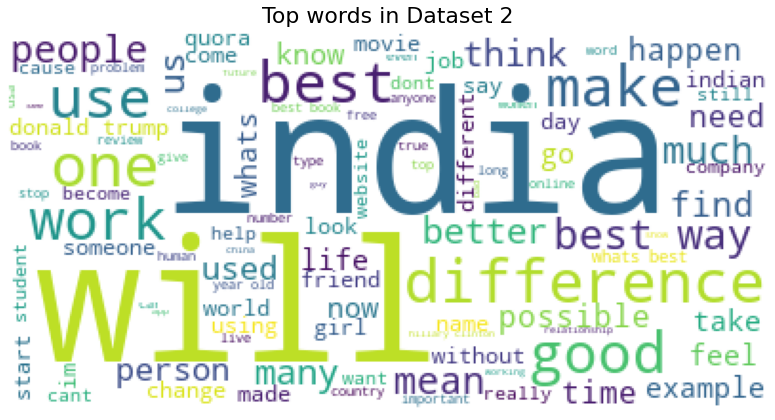

In [27]:
wc = WordCloud(
    background_color='white', 
    max_words=100, 
)
wc.generate(' '.join(text for text in dataset2['question']))
plt.figure(figsize=(14,7))
plt.title('Top words in Dataset 2', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [28]:
dataset2['question_len'].describe()

count    537358.000000
mean         11.411143
std           6.246460
min           1.000000
25%           7.000000
50%          10.000000
75%          14.000000
max         237.000000
Name: question_len, dtype: float64

In [29]:
from plotly import graph_objs as go

In [30]:
data = pd.DataFrame(dataset2.question_len.value_counts().reset_index().values, columns=["question_len", "count"])
dataindex = data.sort_index(axis = 0, ascending=True)
dataindex

,question_len,count
0,8,60675
1,9,57088
2,7,54159
3,10,51648
4,6,39588
...,...,...
97,107,1
98,89,1
99,93,1
100,90,1


In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dataindex['question_len'],
    y=dataindex['count'],
    # fill='tozeroy',
    marker_color='red',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Question Length Distribution (2-50)</span>',
)
fig.update_xaxes(range=[2, 50])
fig.show()

In [38]:
dataset2['question'] = dataset2['question'].str.replace(r' +', ' ')
dataset2['question'] = dataset2['question'].str.replace(' ', ',')
dataset2['question'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



0    what,is,the,step,by,step,guide,to,invest,in,sh...
1    what,is,the,step,by,step,guide,to,invest,in,sh...
2       what,is,the,story,of,kohinoor,kohinoor,diamond
3    what,would,happen,if,the,indian,government,sto...
4    how,can,i,increase,the,speed,of,my,internet,co...
Name: question, dtype: object

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
import math
from collections import defaultdict
import re

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    file_clean_k =pd.DataFrame()
    for index,entry in enumerate(data):
        
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
            # The final processed set of words for each iteration will be stored in 'text_final'
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words)
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words)
                file_clean_k=file_clean_k.replace(to_replace ="\[.", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ="'", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace =" ", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ='\]', value = '', regex = True)
    return file_clean_k

In [42]:
data2 = dataset2.head(38000).reset_index(drop = True)

In [43]:
data2.question[0]

'what,is,the,step,by,step,guide,to,invest,in,share,market,in,india'

**TF-IDF**

In [44]:
# Membuat vocabulary
vocabulary = set()
for doc in data2.question:
    vocabulary.update(doc.split(','))
vocabulary = list(vocabulary)

# Menentukan model TF-IDF yang digunakan (Natural-TFIDF {NT})
tfidf = TfidfVectorizer(vocabulary=vocabulary)

# Fit the TF-IDF model
tfidf.fit(data2.question)

# Transform the TF-IDF model
tfidf_tran=tfidf.transform(data2.question)

**Create a vector for Query/search keywords**

In [45]:
def gen_vector_T(tokens):
    Q = np.zeros((len(vocabulary)))    
    x= tfidf.transform(tokens)
    print(tokens[0].split(','))
    for token in tokens[0].split(','):
        print(token)
        try:
            ind = vocabulary.index(token)
            Q[ind]  = x[0, tfidf.vocabulary_[token]]
        except:
            pass
    return Q

**Cosine Similarity function for the calculation**

In [46]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

Cosine Similarity document to query function

In [47]:
def cosine_similarity_T(k, query):
    preprocessed_query = preprocessed_query = re.sub("\W+", " ", query).strip()
    tokens = word_tokenize(str(preprocessed_query))
    q_df = pd.DataFrame(columns=['q_clean'])
    q_df.loc[0,'q_clean'] =tokens
    q_df['q_clean'] =wordLemmatizer(q_df.q_clean)
    d_cosines = []
    
    query_vector = gen_vector_T(q_df['q_clean'])
    for d in tfidf_tran.A:
        d_cosines.append(cosine_sim(query_vector, d))
                    
    out = np.array(d_cosines).argsort()[-k:][::-1]
    #print("")
    d_cosines.sort()
    a = pd.DataFrame()
    for i,index in enumerate(out):
        a.loc[i,'index'] = str(index)
        a.loc[i,'Question'] = data2['raw_question'][index]
    for j,simScore in enumerate(d_cosines[-k:][::-1]):
        a.loc[j,'Score'] = simScore
    return a

In [49]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [50]:
cosine_similarity_T(10,'technologies for automation')

['technology', 'automation']
technology
automation


,index,Question,Score
0,423,What are the best career growth technologies f...,0.541701
1,13744,How do I start with the automation testing?,0.514151
2,19061,What are the best tools for SEO automation?,0.491028
3,13745,How can I start QTP/UFT automation testing?,0.428300
4,28118,How do you start a technology company?,0.357266
5,11445,Can I pursue robotics and automation engineeri...,0.337101
6,15469,What are some tips on making it through the jo...,0.336319
7,31278,How does technology change culture?,0.335178
8,5288,Importance of information technology?,0.318301
9,22787,What are the top technology trends?,0.311570


In [51]:
cosine_similarity_T(10,'bad dream')

['bad', 'dream']
bad
dream


,index,Question,Score
0,524,What do you do if you had a bad dream?,0.644879
1,27385,How can you dream within a dream?,0.632071
2,27384,How can I have a dream within a dream?,0.626716
3,24706,What is your dream?,0.610758
4,22436,Why do we dream a particular dream?,0.602531
5,22435,Can we dream of dreaming a dream?,0.599151
6,24705,What is a dream card?,0.539576
7,31833,What is your dream job? Why is that your dream...,0.510934
8,7396,What is the power of a dream?,0.500243
9,31834,"What is your dream job, and why?",0.479199


In [52]:
cosine_similarity_T(10,'climate change')

['climate', 'change']
climate
change


,index,Question,Score
0,8140,Why do climate change deniers deny climate cha...,0.803238
1,33558,Can we stop climate change?,0.775239
2,33559,What can we do to stop climate change?,0.738964
3,945,Can climate change be reversed?,0.673950
4,28539,Why doesn't Trump believe in climate change?,0.658957
5,34653,Is the study of climate change a pseudoscience?,0.627414
6,8139,Why do so many people not believe in climate c...,0.623118
7,21727,Is Game of thrones really about Climate Change?,0.607061
8,14503,Why are so many people denying climate change?,0.593015
9,10342,Is global warming now called climate change? I...,0.551340
